## Data Extraction and Loading

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading in the data set
ball =pd.read_csv('NBA_DATA.csv', header=0)
ball.head(10)

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS/MINUS
0,GSW,6/10/19,GSW @ TOR,W,240.0,106.0,38.0,82.0,46.3,20.0,...,71.4,6.0,31.0,37.0,27.0,5.0,7.0,15.0,22.0,1.0
1,TOR,6/10/19,TOR vs. GSW,L,238.0,105.0,38.0,85.0,44.7,8.0,...,77.8,13.0,30.0,43.0,19.0,6.0,5.0,13.0,19.0,-1.0
2,TOR,6/7/19,TOR @ GSW,W,241.0,105.0,36.0,86.0,41.9,10.0,...,95.8,7.0,32.0,39.0,22.0,12.0,4.0,9.0,21.0,13.0
3,GSW,6/7/19,GSW vs. TOR,L,241.0,92.0,35.0,78.0,44.9,8.0,...,66.7,8.0,34.0,42.0,26.0,6.0,6.0,17.0,23.0,-13.0
4,TOR,6/5/19,TOR @ GSW,W,239.0,123.0,43.0,82.0,52.4,17.0,...,95.2,5.0,35.0,40.0,30.0,9.0,10.0,14.0,22.0,14.0
5,GSW,6/5/19,GSW vs. TOR,L,241.0,109.0,36.0,91.0,39.6,12.0,...,83.3,13.0,28.0,41.0,25.0,8.0,3.0,14.0,21.0,-14.0
6,TOR,6/2/19,TOR vs. GSW,L,240.0,104.0,35.0,94.0,37.2,11.0,...,88.5,15.0,34.0,49.0,17.0,8.0,2.0,15.0,22.0,-5.0
7,GSW,6/2/19,GSW @ TOR,W,240.0,109.0,38.0,82.0,46.3,13.0,...,87,6.0,36.0,42.0,34.0,7.0,5.0,15.0,26.0,5.0
8,GSW,5/30/19,GSW @ TOR,L,239.0,109.0,34.0,78.0,43.6,12.0,...,93.5,9.0,29.0,38.0,29.0,6.0,2.0,16.0,27.0,-9.0
9,TOR,5/30/19,TOR vs. GSW,W,241.0,118.0,39.0,77.0,50.6,13.0,...,84.4,7.0,29.0,36.0,25.0,6.0,6.0,10.0,26.0,9.0


In [3]:
#Respective box scores for home and away do not fall within the same line
#In order to do any analysis these need to be same line items
#Will create two different dataframes a home and away , then merge them together
Home = ball.loc[ball.MATCHUP.str.contains("vs.", na=False)]
Away = ball.loc[ball.MATCHUP.str.contains("@", na = False)]

In [4]:
Home.head(10)
Away.head(10)

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS/MINUS
0,GSW,6/10/19,GSW @ TOR,W,240.0,106.0,38.0,82.0,46.3,20.0,...,71.4,6.0,31.0,37.0,27.0,5.0,7.0,15.0,22.0,1.0
2,TOR,6/7/19,TOR @ GSW,W,241.0,105.0,36.0,86.0,41.9,10.0,...,95.8,7.0,32.0,39.0,22.0,12.0,4.0,9.0,21.0,13.0
4,TOR,6/5/19,TOR @ GSW,W,239.0,123.0,43.0,82.0,52.4,17.0,...,95.2,5.0,35.0,40.0,30.0,9.0,10.0,14.0,22.0,14.0
7,GSW,6/2/19,GSW @ TOR,W,240.0,109.0,38.0,82.0,46.3,13.0,...,87,6.0,36.0,42.0,34.0,7.0,5.0,15.0,26.0,5.0
8,GSW,5/30/19,GSW @ TOR,L,239.0,109.0,34.0,78.0,43.6,12.0,...,93.5,9.0,29.0,38.0,29.0,6.0,2.0,16.0,27.0,-9.0
11,MIL,5/25/19,MIL @ TOR,L,240.0,94.0,30.0,75.0,40,12.0,...,71,12.0,30.0,42.0,19.0,7.0,7.0,11.0,22.0,-6.0
12,TOR,5/23/19,TOR @ MIL,W,240.0,105.0,31.0,84.0,36.9,18.0,...,80.6,10.0,35.0,45.0,19.0,6.0,4.0,6.0,16.0,6.0
14,MIL,5/21/19,MIL @ TOR,L,241.0,102.0,37.0,80.0,46.3,11.0,...,65.4,7.0,33.0,40.0,30.0,8.0,7.0,12.0,22.0,-18.0
16,GSW,5/20/19,GSW @ POR,W,264.0,119.0,46.0,99.0,46.5,12.0,...,78.9,15.0,41.0,56.0,30.0,10.0,5.0,15.0,17.0,2.0
18,MIL,5/19/19,MIL @ TOR,L,291.0,112.0,38.0,102.0,37.3,14.0,...,66.7,13.0,50.0,63.0,22.0,14.0,5.0,20.0,30.0,-6.0


In [5]:
# Creating seperate data frames for home and away teams
home = ball[ball.MATCHUP.str.contains('vs.')]
away = ball[ball.MATCHUP.str.contains('@')]

ValueError: cannot index with vector containing NA / NaN values

In [6]:
# Renaming the statistical columns in the home team dataframe to make them all home orientated 
Home.rename(columns={'TEAM':'H_TEAM','PTS':'H_PTS','FGM':'H_FGM','FGA':'H_FGA', 'FG%':'H_FGPct', 
                    '3PM':'H_3PM', '3PA':'H_3PA', '3P%':'H_ThreePPct', 'FTM':'H_FTM', 'FTA':'H_FTA', 
                    'FT%':'H_FTPct', 'OREB':'H_OREB', 'DREB':'H_DREB', 'REB':'H_REB', 'AST':'H_AST',
                    'STL':'H_STL', 'BLK':'H_BLK', 'TOV':'H_TOV', 'PF':'H_PF', 'PLUS/MINUS':'H_+/'}, inplace=True)

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [7]:
# Renaming the columns in the away team data frame to make them all away orientated 
Away.rename(columns={'TEAM':'A_TEAM','W/L':'A_W/L','MIN':'A_MIN','PTS':'A_PTS','FGM':'A_FGM','FGA':'A_FGA', 'FG%':'A_FGPct', 
                    '3PM':'A_3PM', '3PA':'A_3PA', '3P%':'A_ThreePPct', 'FTM':'A_FTM', 'FTA':'A_FTA', 
                    'FT%':'A_FTPct', 'OREB':'A_OREB', 'DREB':'A_DREB', 'REB':'A_REB', 'AST':'A_AST',
                    'STL':'A_STL', 'BLK':'A_BLK', 'TOV':'A_TOV', 'PF':'A_PF', 'PLUS/MINUS':'A_+/'}, inplace=True)

In [8]:
# Will need to develop a primary key to join the home and away dataframes on
#Creating an idential Away Team Variable to join the dataset together
Home['Away_Team'] = Home['MATCHUP'].str[-3:] 
Away['Away_Team'] = Away['MATCHUP'].str[:3]

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
# inner joining ot make a new dataframe
df = pd.merge(Home, Away,left_on=[Home['DATE'], Home['Away_Team']], right_on=[Away['DATE'], Away['Away_Team']], how='inner')

In [10]:
df.columns

Index(['key_0', 'key_1', 'H_TEAM', 'DATE_x', 'MATCHUP_x', 'W/L', 'MIN',
       'H_PTS', 'H_FGM', 'H_FGA', 'H_FGPct', 'H_3PM', 'H_3PA', 'H_ThreePPct',
       'H_FTM', 'H_FTA', 'H_FTPct', 'H_OREB', 'H_DREB', 'H_REB', 'H_AST',
       'H_STL', 'H_BLK', 'H_TOV', 'H_PF', 'H_+/', 'Away_Team_x', 'A_TEAM',
       'DATE_y', 'MATCHUP_y', 'A_W/L', 'A_MIN', 'A_PTS', 'A_FGM', 'A_FGA',
       'A_FGPct', 'A_3PM', 'A_3PA', 'A_ThreePPct', 'A_FTM', 'A_FTA', 'A_FTPct',
       'A_OREB', 'A_DREB', 'A_REB', 'A_AST', 'A_STL', 'A_BLK', 'A_TOV', 'A_PF',
       'A_+/', 'Away_Team_y'],
      dtype='object')

In [11]:
# Dropping duplicates since when using the join makes a row for each possible combination
df = df.drop_duplicates()

In [12]:
# Dropping duplicate columns that are not necessary 
df = df.drop(['key_0', 'key_1', 'Away_Team_x', 'DATE_y', 'MATCHUP_y', 'A_MIN', 'Away_Team_y'], axis=1)

# Renaming the columns in order get ride of unwanted signs 
df.rename(columns={'DATE_x':'DATE','MATCHUP_x':'MATCHUP','W/L':'H_W/L'}, inplace=True)

In [13]:
# Calculating the efficiency metrics

# Calculating both home and away Effective Field Goal (EFG) Percentage 
df['H_EFGPct'] = ((df['H_FGM']-df['H_3PM'] + 1.5 * df['H_3PM'])/ df['H_FGA'])
df['A_EFGPct'] = ((df['A_FGM']-df['A_3PM'] + 1.5 * df['A_3PM'])/ df['A_FGA'])

# Calculating home and away Free Throw Rate (FTR)
df['H_FTR'] = df['H_FTA'] / df['H_FGA']
df['A_FTR'] = df['A_FTA'] / df['A_FGA']

# Calculating home and away Turnover Percentage
df['H_TOVPct'] = (df['H_TOV'] / (df['H_FGA'] + (.44 * df['H_FTA']) + df['H_TOV'])) * 100
df['A_TOVPct'] = (df['A_TOV'] / (df['A_FGA'] + (.44 * df['A_FTA']) + df['A_TOV'])) * 100

#Calculating both home and away defensive rebounding percentage
df['H_DREBPct'] = df['H_DREB'] / (df['H_DREB'] + df['A_OREB'])
df['A_DREBPct'] = df['A_DREB'] / (df['A_DREB'] + df['H_OREB'])

# Calculating both home and away offensive rebounding percentage
df['H_OREBPct'] = df['H_OREB'] / (df['H_OREB'] + df['A_DREB'])
df['A_OREBPct'] = df['A_OREB'] / (df['A_OREB'] + df['H_DREB'])

# Calculating both home and away total rebound percentage
df['H_REBPct'] = df['H_REB'] / (df['H_REB'] + df['A_REB'])
df['A_REBPct'] = df['A_REB'] / (df['A_REB'] + df['H_REB'])

# Calculating both home and away block percentage
df['H_BLKPct'] = df['H_BLK'] / df['A_FGA']
df['A_BLKPct'] = df['A_BLK'] / df['H_FGA']

# Calculating both home and away assist ratio 
df['H_ASTRatio'] = df['H_AST'] / (df['H_FGA'] + (df['H_FTA'] * 0.44) + df['H_AST'] + df['H_TOV'])
df['A_ASTRatio'] = df['A_AST'] / (df['A_FGA'] + (df['A_FTA'] * 0.44) + df['A_AST'] + df['A_TOV'])

# Calculating both home and away assit to turnover ratio
df['H_AST_TOV_Ratio'] = df['H_AST'] / df['H_TOV']
df['A_AST_TOV_Ratio'] = df['A_AST'] / df['A_TOV']

# Calculating both home and away 3 Point Attempt Rate
df['H_ThreePARt'] = df['H_3PA'] / df['H_FGA']
df['A_ThreePARt'] = df['A_3PA'] / df['A_FGA']

In [14]:
df.head(10)
print(df.columns)

Index(['H_TEAM', 'DATE', 'MATCHUP', 'H_W/L', 'MIN', 'H_PTS', 'H_FGM', 'H_FGA',
       'H_FGPct', 'H_3PM', 'H_3PA', 'H_ThreePPct', 'H_FTM', 'H_FTA', 'H_FTPct',
       'H_OREB', 'H_DREB', 'H_REB', 'H_AST', 'H_STL', 'H_BLK', 'H_TOV', 'H_PF',
       'H_+/', 'A_TEAM', 'A_W/L', 'A_PTS', 'A_FGM', 'A_FGA', 'A_FGPct',
       'A_3PM', 'A_3PA', 'A_ThreePPct', 'A_FTM', 'A_FTA', 'A_FTPct', 'A_OREB',
       'A_DREB', 'A_REB', 'A_AST', 'A_STL', 'A_BLK', 'A_TOV', 'A_PF', 'A_+/',
       'H_EFGPct', 'A_EFGPct', 'H_FTR', 'A_FTR', 'H_TOVPct', 'A_TOVPct',
       'H_DREBPct', 'A_DREBPct', 'H_OREBPct', 'A_OREBPct', 'H_REBPct',
       'A_REBPct', 'H_BLKPct', 'A_BLKPct', 'H_ASTRatio', 'A_ASTRatio',
       'H_AST_TOV_Ratio', 'A_AST_TOV_Ratio', 'H_ThreePARt', 'A_ThreePARt'],
      dtype='object')


In [15]:
#THis will be usefull for identifying the total points scored in a game by both the away and home team.
#Common applications of this include over/under betting via linear regression analysis
df['total_points'] = df['H_PTS'] + df['A_PTS']

In [16]:
df.head(2)

,H_TEAM,DATE,MATCHUP,H_W/L,MIN,H_PTS,H_FGM,H_FGA,H_FGPct,H_3PM,...,A_REBPct,H_BLKPct,A_BLKPct,H_ASTRatio,A_ASTRatio,H_AST_TOV_Ratio,A_AST_TOV_Ratio,H_ThreePARt,A_ThreePARt,total_points
0,TOR,6/10/19,TOR vs. GSW,L,238.0,105.0,38.0,85.0,44.7,8.0,...,0.462500,0.060976,0.082353,0.147424,0.207437,1.461538,1.800000,0.376471,0.512195,211.0
1,GSW,6/7/19,GSW vs. TOR,L,241.0,92.0,35.0,78.0,44.9,8.0,...,0.481481,0.069767,0.051282,0.199631,0.172468,1.529412,2.444444,0.346154,0.372093,197.0


In [17]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace = True)
print(df.isnull().sum().sum())

0


## Data Pre-processing and Key Variable Identification

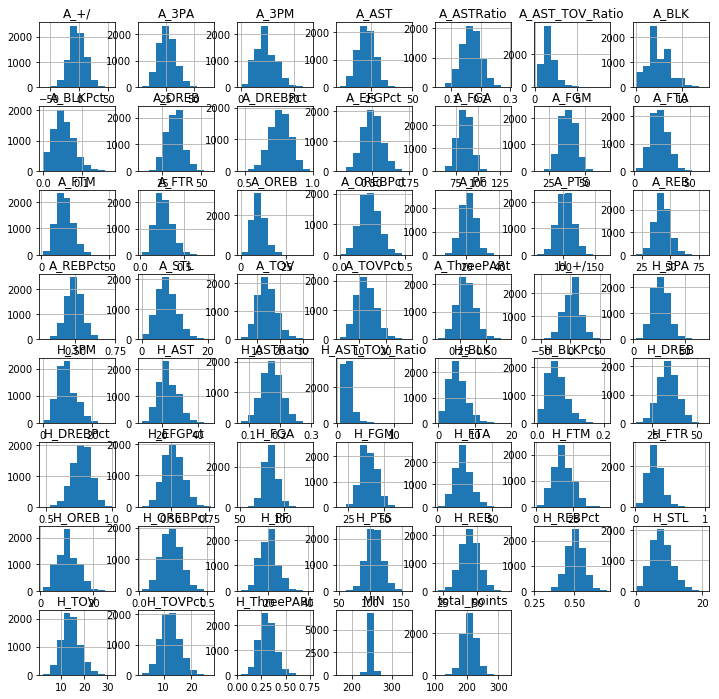

In [18]:
#Plot histogram of the numeric features
pd.DataFrame.hist(df, figsize = [12,12]);

In [19]:
#Everything Seems to somewhat have a normal distribution
#This might be a point of examination - determining what other methods
#i can use to normalize/standardize the data


In [20]:
#Identifying possible data imbalance issues with the target variables H_W/L
df['H_W/L'].value_counts()

W    4419
L    3106
Name: H_W/L, dtype: int64

## WINS/LOSSES Attributes

In [21]:
# Feature Engineering for identifying key variables that correlate well with Home team wins/losses
X1 = df[['H_EFGPct'
       ,'A_EFGPct'
       ,'H_FTR'
       ,'A_FTR'
       ,'H_TOVPct'
       ,'A_TOVPct'
       ,'H_DREBPct'
       ,'A_DREBPct'
       ,'H_OREBPct'
       ,'A_OREBPct'
       ,'H_REBPct'
       ,'A_REBPct'
       ,'H_BLKPct'
       ,'A_BLKPct'
       ,'H_ASTRatio'
       ,'A_ASTRatio'
       ,'H_AST_TOV_Ratio'
       ,'A_AST_TOV_Ratio'
       ,'H_ThreePARt'
       ,'A_ThreePARt'
       ]]
y1 = df[['H_W/L']]

In [22]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.13726996 0.13733494 0.03290358 0.03430773 0.03899958 0.04089874
 0.02562533 0.02616912 0.02613542 0.02555487 0.06961611 0.07876303
 0.02915192 0.02785117 0.0588215  0.05894565 0.04943878 0.05195846
 0.02526624 0.02498785]


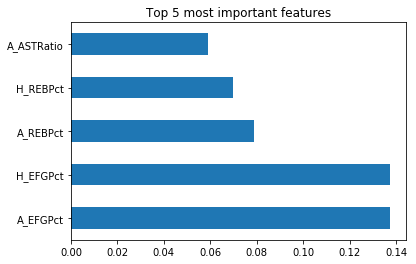

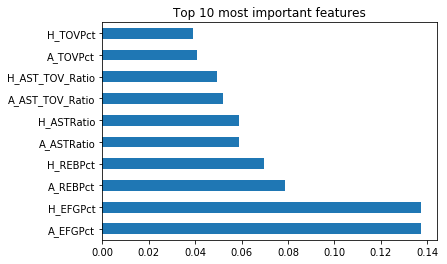

In [23]:
# Feature Importance to identify top 5 drivers and top 10 drivers
#Feature Importance among the variables using ExtraTreesClassifier
importance_model = ExtraTreesClassifier(n_estimators=100)
importance_model.fit(X1,y1)
print(importance_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(importance_model.feature_importances_, index=X1.columns)
#Check the top 3 features with highest score
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Top 5 most important features')
plt.show()
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 most important features')
plt.show()

In [24]:
# Feature extraction using Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'newton-cg', random_state = 2019)
rfe = RFE(model, 3)
fit = rfe.fit(X1, y1)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
feature_names = np.array(X1.columns)
print('Most important features (RFE): %s'% feature_names[fit.support_])

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features: 3
Selected Features: [ True  True False False False False False False False False False  True
 False False False False False False False False]
Feature Ranking: [ 1  1  4  3 17 18  6  5  8 11  2  1  7 12 13 14 10  9 16 15]
Most important features (RFE): ['H_EFGPct' 'A_EFGPct' 'A_REBPct']


In [25]:
# Split the data into training and test sets 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, y1, test_size=0.40, random_state=2019)

In [26]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state = 2019 , solver = 'newton-cg')

# fit the model with data
logreg.fit(X1_train,Y1_train)

#
y_pred=logreg.predict(X1_test)

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# import the metrics class
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
cnf_matrix = metrics.confusion_matrix(Y1_test, y_pred)
cnf_matrix

array([[1081,  149],
       [  91, 1689]])

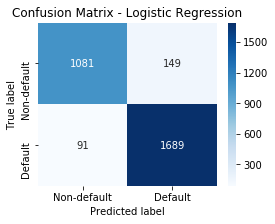

In [28]:
# Plot Confusion Matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y1_test,logreg.predict(X1_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

In [29]:
print("Accuracy:",metrics.accuracy_score(Y1_test, y_pred))
print("Precision:",metrics.precision_score(Y1_test, y_pred, average=None))
print("Recall:",metrics.recall_score(Y1_test, y_pred, average =None))

Accuracy: 0.920265780730897
Precision: [0.92235495 0.91893362]
Recall: [0.87886179 0.9488764 ]


In [30]:
s = pd.Series(y_pred)
print(s)
df.concat(s)
df.head()

0       W
1       W
2       L
3       W
4       W
5       W
6       W
7       W
8       W
9       W
10      L
11      L
12      W
13      L
14      W
15      W
16      W
17      W
18      W
19      W
20      W
21      W
22      L
23      W
24      W
25      W
26      W
27      L
28      W
29      W
       ..
2980    W
2981    W
2982    L
2983    W
2984    W
2985    L
2986    L
2987    W
2988    W
2989    L
2990    W
2991    L
2992    L
2993    W
2994    W
2995    L
2996    W
2997    L
2998    L
2999    L
3000    W
3001    L
3002    W
3003    W
3004    W
3005    L
3006    W
3007    L
3008    W
3009    L
Length: 3010, dtype: object


AttributeError: 'DataFrame' object has no attribute 'concat'

In [31]:
## 10-fold cross-validation to avoid over-fitting
from sklearn.model_selection import cross_val_score
scoring = 'accuracy'
#LR_cv_scores =cross_val_score(LR, X_resample, y_resample, cv=kfold, scoring=scoring)
cv_scores =cross_val_score(logreg, X1_test, Y1_test, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),2)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),2)))

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Average 10-Fold CV Score: 0.91 , Standard deviation: 0.01


/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

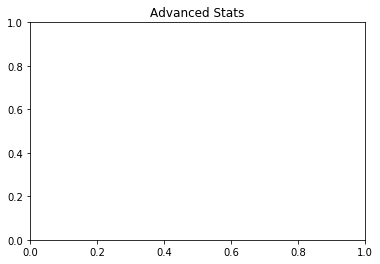

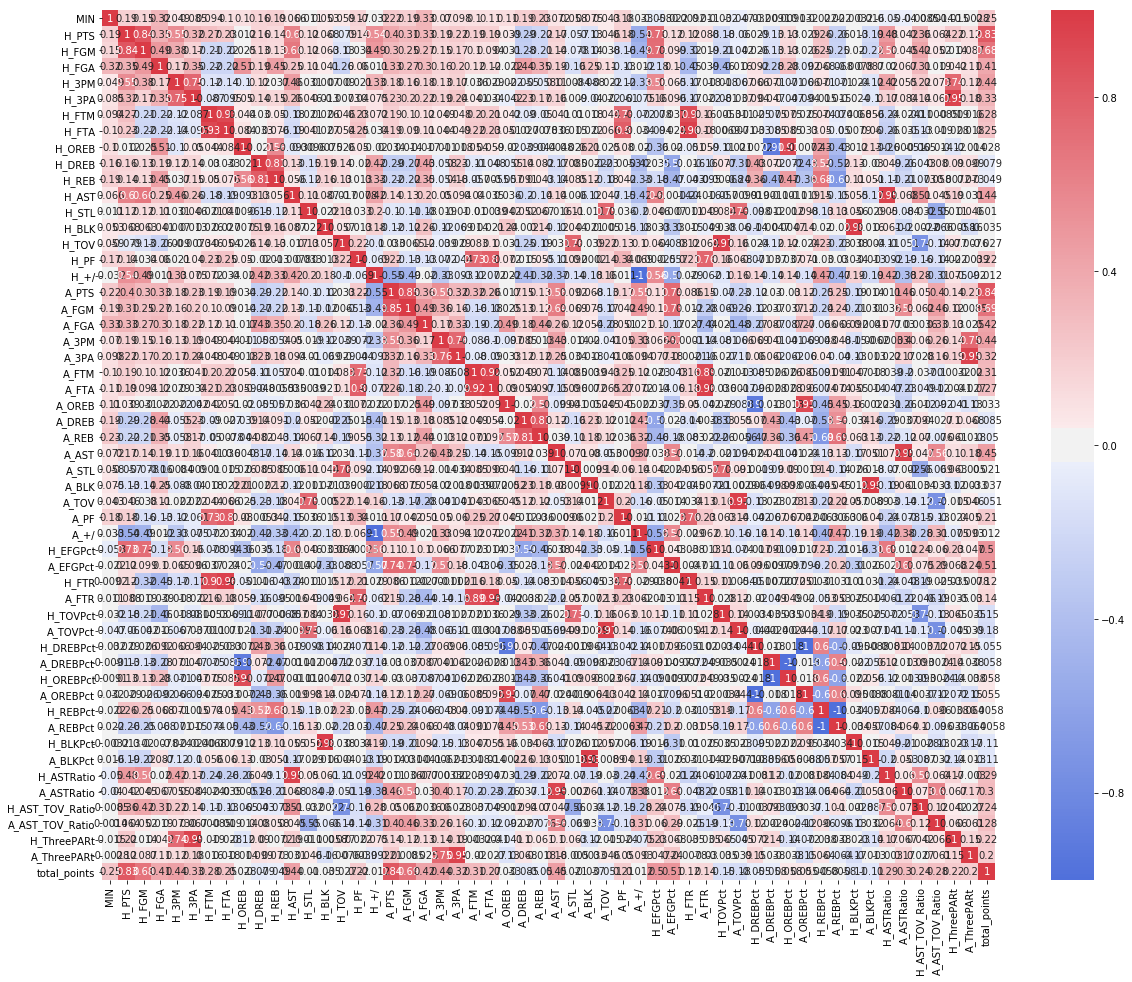

In [32]:
#This will yield a messy result due to shear size
correl = df.corr()
ax=plt.axes()
plt.subplots(figsize=(20,16))
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(correl,annot =True, xticklabels = correl.columns.values, yticklabels = correl.columns.values, cmap=cmap);
ax.set_title('Advanced Stats');

## Spread

In [33]:
#This is a calculated value which is the difference between the to home team and away team score
# A new column will need to be added to DF will call it spread
df['spread'] = df['H_PTS'] - df['A_PTS']
df.head(5)
#Spread column created - next step invovles using a linear regresion and other means of modeling such as xgboost
#need to also identify which variables have a linear relationship with th the target

,H_TEAM,DATE,MATCHUP,H_W/L,MIN,H_PTS,H_FGM,H_FGA,H_FGPct,H_3PM,...,H_BLKPct,A_BLKPct,H_ASTRatio,A_ASTRatio,H_AST_TOV_Ratio,A_AST_TOV_Ratio,H_ThreePARt,A_ThreePARt,total_points,spread
0,TOR,6/10/19,TOR vs. GSW,L,238.0,105.0,38.0,85.0,44.7,8.0,...,0.060976,0.082353,0.147424,0.207437,1.461538,1.800000,0.376471,0.512195,211.0,-1.0
1,GSW,6/7/19,GSW vs. TOR,L,241.0,92.0,35.0,78.0,44.9,8.0,...,0.069767,0.051282,0.199631,0.172468,1.529412,2.444444,0.346154,0.372093,197.0,-13.0
2,GSW,6/5/19,GSW vs. TOR,L,241.0,109.0,36.0,91.0,39.6,12.0,...,0.036585,0.109890,0.174581,0.221828,1.785714,2.142857,0.395604,0.463415,232.0,-14.0
3,TOR,6/2/19,TOR vs. GSW,L,240.0,104.0,35.0,94.0,37.2,11.0,...,0.024390,0.053191,0.123690,0.240930,1.133333,2.266667,0.404255,0.414634,213.0,-5.0
4,TOR,5/30/19,TOR vs. GSW,W,241.0,118.0,39.0,77.0,50.6,13.0,...,0.076923,0.025974,0.198287,0.212237,2.500000,1.812500,0.428571,0.397436,227.0,9.0


## Spread - Variable identification

In [34]:

X2 = df[['H_EFGPct'
       ,'A_EFGPct'
       ,'H_FTR'
       ,'A_FTR'
       ,'H_TOVPct'
       ,'A_TOVPct'
       ,'H_DREBPct'
       ,'A_DREBPct'
       ,'H_OREBPct'
       ,'A_OREBPct'
       ,'H_REBPct'
       ,'A_REBPct'
       ,'H_BLKPct'
       ,'A_BLKPct'
       ,'H_ASTRatio'
       ,'A_ASTRatio'
       ,'H_AST_TOV_Ratio'
       ,'A_AST_TOV_Ratio'
       ,'H_ThreePARt'
       ,'A_ThreePARt'
       ]]
y2 = df[['spread']]


## Spread Feature Engineering

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.05707399 0.05836406 0.04994716 0.05015565 0.05032299 0.0497037
 0.04645812 0.04662382 0.04652397 0.04695247 0.049933   0.05052323
 0.04895434 0.04885041 0.05120635 0.05009012 0.05024333 0.05006421
 0.04904866 0.04896042]


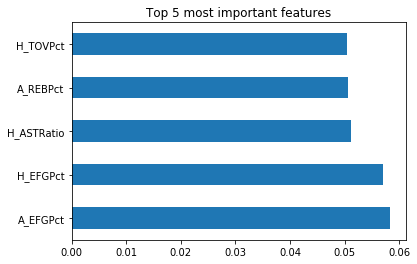

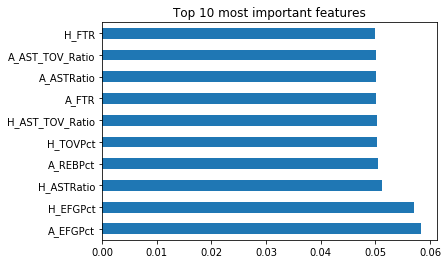

In [35]:
# Feature Importance to identify top 5 drivers and top 10 drivers
#Feature Importance among the variables using ExtraTreesClassifier
importance_model = ExtraTreesClassifier(n_estimators=100)
importance_model.fit(X2,y2)
print(importance_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(importance_model.feature_importances_, index=X2.columns)
#Check the top 3 features with highest score
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Top 5 most important features')
plt.show()
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 most important features')
plt.show()

In [36]:
#Identify linear relationshipsbetween variables and the target
#Creating a list of the top 10 features to feed through the linearity test
variable_collection = [df.A_FTR, df.H_TOVPct,df. H_AST_TOV_Ratio, df.A_BLKPct, df.A_TOVPct, df.A_ASTRatio, df.H_ASTRatio, df.A_EFGPct, df.H_EFGPct, df.H_BLKPct]

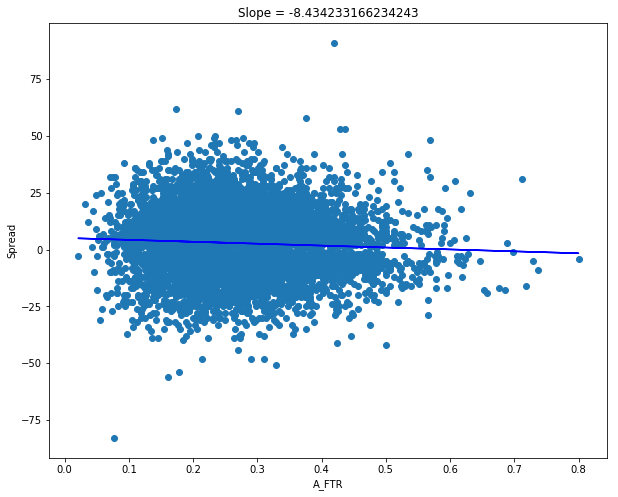

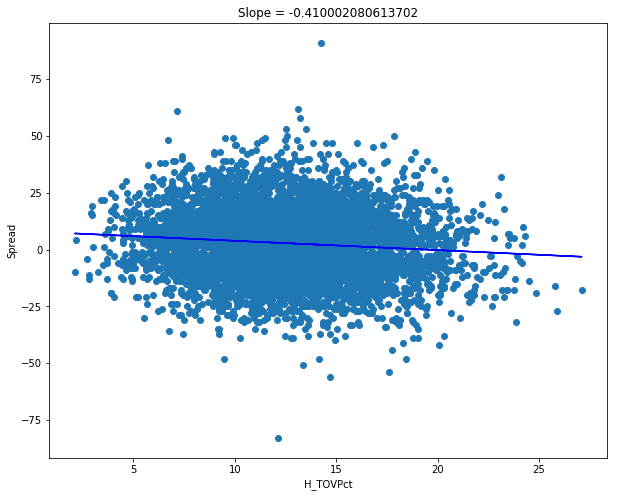

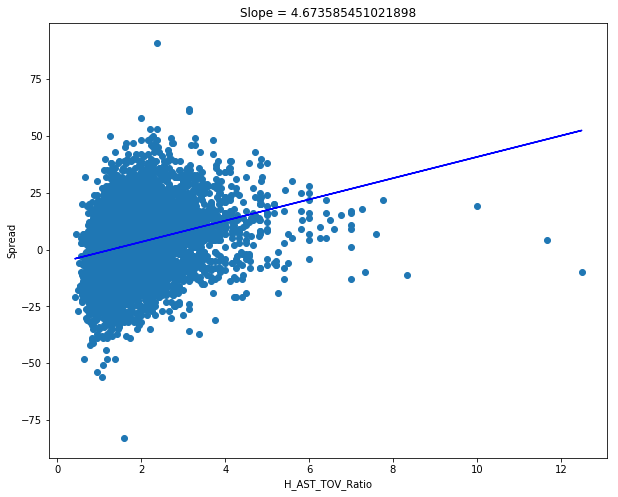

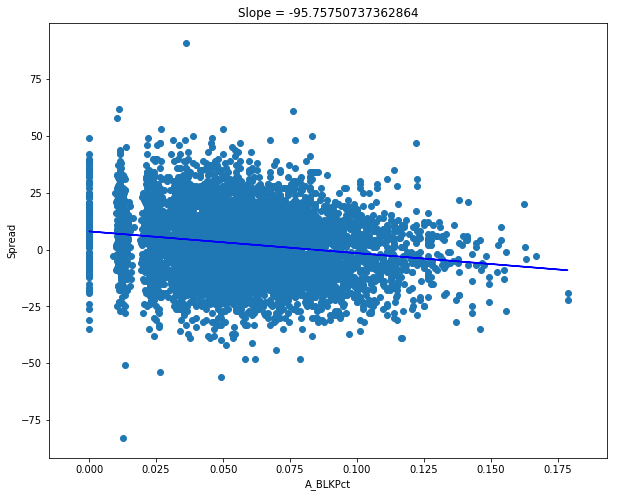

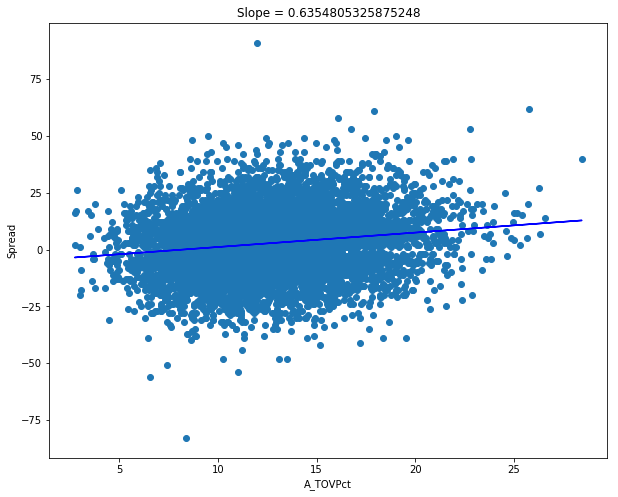

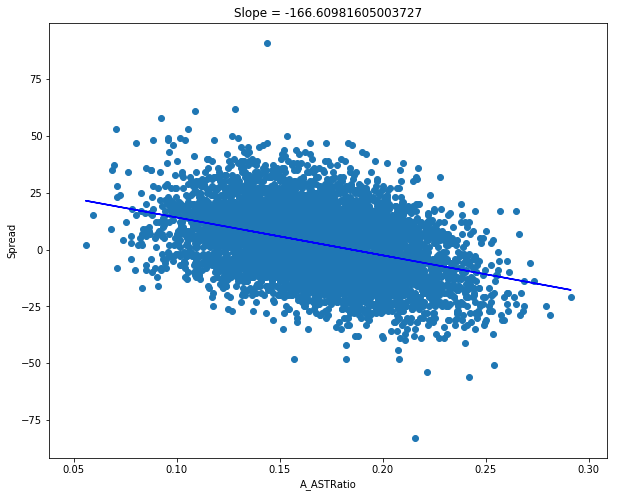

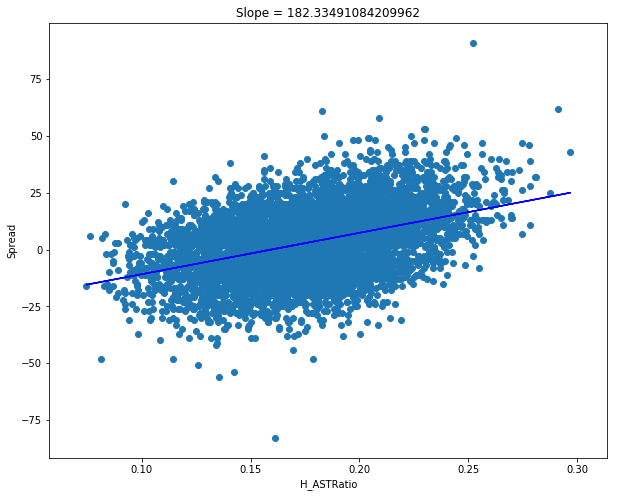

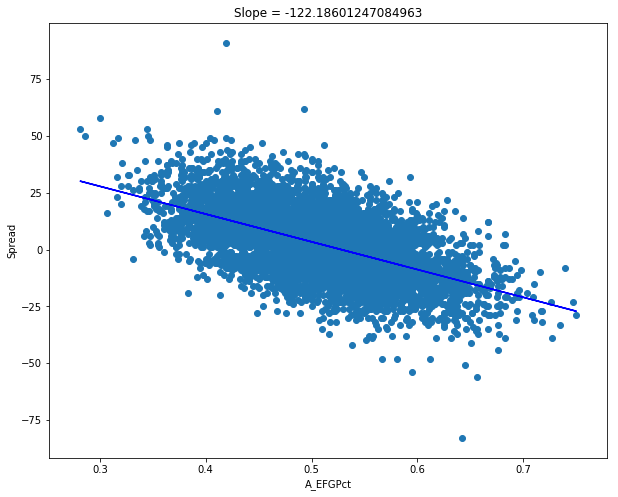

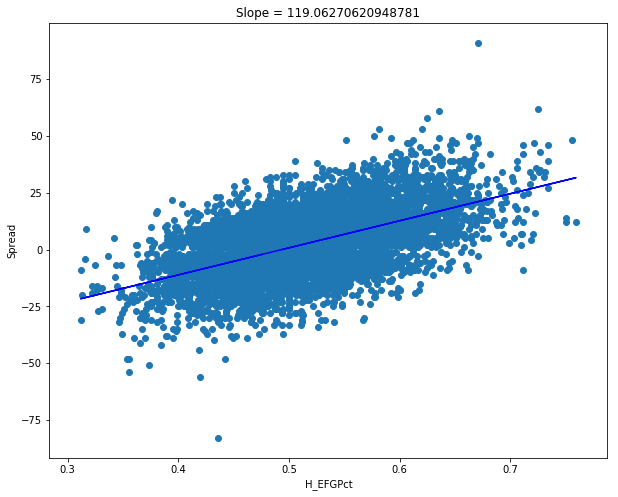

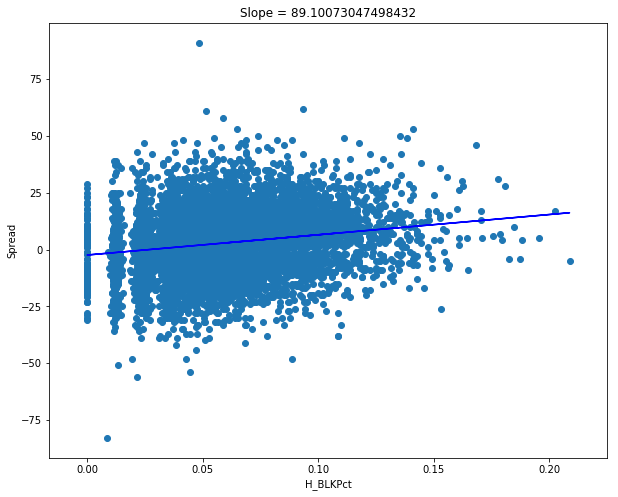

In [38]:
for i in variable_collection:
    x = np.array(i)
    y = np.array(df.spread)

# Deriving slope,intercept values
    slope, intercept = np.polyfit(x, y, 1)
    abline_values = [slope * i + intercept for i in x]

#Plotting the figure
    plt.figure(figsize=(10,8))
    plt.scatter(x, y)
    plt.plot(x, abline_values, 'b')
    plt.title("Slope = %s" % (slope))
    plt.xlabel(i.name)
    plt.ylabel("Spread")
    plt.show()

In [38]:
# Importing Linear Rgression Model 
from sklearn.linear_model import LinearRegression

In [39]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X2, y2, test_size=0.3, random_state=2019)

In [40]:
# Instantiate
linreg = LinearRegression()

# Fitting the model 
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
# Printing the y-intercept
print(linreg.intercept_)

# Prints the beta coefficients in same order as passed
print(linreg.coef_)

[1.5890863]
[[ 1.26503545e+02 -1.30612247e+02  1.34454176e+01 -1.34899637e+01
  -1.39771782e+00  1.38404516e+00  7.14737338e+00 -6.68221922e+00
   6.68221922e+00 -7.14737338e+00  3.39954884e+01 -3.39954884e+01
  -9.51294012e+00  9.78399498e+00  5.91324832e+00 -1.74045975e+00
  -2.13541372e-02 -7.05097757e-02  5.79123209e+00 -5.60926680e+00]]


In [42]:
# Making a predictive model
Y_pred = linreg.predict(X_test)

In [43]:
# Print result of MAE
print(metrics.mean_absolute_error(Y_test, Y_pred))

# Print result of MSE
print(metrics.mean_squared_error(Y_test, Y_pred))

# Print result of RMSE 
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

2.9787601589870043
16.93036287255479
4.114652217691647


In [50]:
#Variable optiization
#variable_collection = [df.A_FTR, df.H_TOVPct,df. H_AST_TOV_Ratio, df.A_BLKPct, df.A_TOVPct, df.A_ASTRatio, df.H_ASTRatio, df.A_EFGPct, df.H_EFGPct, df.H_BLKPct]
X3 = df[['H_TOVPct','A_TOVPct', 'A_ASTRatio','H_ASTRatio','A_EFGPct','H_EFGPct']]
y3 = df[['spread']]



In [51]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X3, y3, test_size=0.3, random_state=2019)

In [52]:
# Instantiate
linreg = LinearRegression()

# Fitting the model 
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
# Printing the y-intercept
print(linreg.intercept_)

# Prints the beta coefficients in same order as passed
print(linreg.coef_)

[2.86657427]
[[  -1.1837782     1.17895249   21.32803188  -18.98008055 -146.93925023
   142.18369484]]


In [54]:
# Making a predictive model
Y_pred = linreg.predict(X_test)

In [55]:
# Print result of MAE
print(metrics.mean_absolute_error(Y_test, Y_pred))

# Print result of MSE
print(metrics.mean_squared_error(Y_test, Y_pred))

# Print result of RMSE 
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

5.100477975620883
41.63961024418612
6.452876121868924


## XGBOOST Pipeline

In [60]:
import xgboost as xgb
from xgboost import XGBRegressor

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=2019)

In [62]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [63]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[19:43:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [65]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.664520


In [71]:
data_dmatrix = xgb.DMatrix(data=X2,label=y2)
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [72]:
cv_results.head()
print((cv_results["test-rmse-mean"]).tail(1))

49    5.858179
Name: test-rmse-mean, dtype: float64


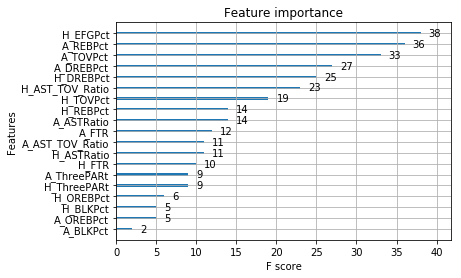

In [70]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()